<a href="https://colab.research.google.com/github/jiiiisoo/deeplearning_yonsei/blob/main/Reinforcement_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pylab as plt
import networkx as nx

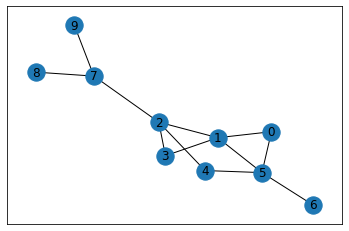

In [2]:
#(a)

#map cell to cell, add circular cell to goal point
points_list = [(0,1), (1,2),(1,3),(2,3),(2,7),(7,9),(7,8),(0,5),(5,4),(4,2),(5,6),(1,5)]

G=nx.Graph()
G.add_edges_from(points_list)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

In [3]:
#(b)

# how many points in graph? x points
MATRIX_SIZE = 10

# create matrix x*y (10개 노드 있으므로 10*10 matrix)
R = np.matrix(np.ones(shape=(MATRIX_SIZE, MATRIX_SIZE)))
R *= -1
print(R)

#we will gonna set reword 0 if it's possible option. (By avoid impossible option)
#도착하는 곳에 도달하며 positive weight 부여

[[-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [-1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]]


In [4]:
#intial setting

goal_path= [(0,1),(1,3),(3,2),(2,7),(7,9)]
goal=9

#points_list = [(0,1), (1,2),(1,3),(2,3),(2,7),(7,9),(7,8),(0,5),(5,4),(4,2),(5,6),(1,5)]
# assign zeros to paths and 100 to goal-reaching point
for point in points_list:
    if point in goal_path:
        R[point] = 100
    else:
        R[point] = 0
    
    if point[::-1] in goal_path:
        R[point[::-1]] = 100
    else:
        # reverse of point
        R[point[::-1]]= 0



# add goal point round trip (destination)
R[goal,goal]=100


R

matrix([[ -1., 100.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,   0., 100.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,   0.,  -1.,   0.,   0.,  -1.,  -1., 100.,  -1.,  -1.],
        [ -1.,   0., 100.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.],
        [  0.,   0.,  -1.,  -1.,   0.,  -1.,   0.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.,  -1.,   0., 100.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,   0.,  -1., 100.]])

In [28]:
#(c)

#10*10 Q table
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

# learning parameter
gamma = 0.7

initial_state = 1

#for given current state, they are finding some state where reward is non negative
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state) 

#randomly sample one of availble action
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

action = sample_next_action(available_act)


#updating Q table by using iterative Bellman equation and return the score
def update(current_state, action, gamma):
    
  max_index = np.where(Q[action,] == np.max(Q[action,]))[1] 
  
  #max가 여러 개일 수 있음
  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = Q[action, max_index]
  
  Q[current_state, action] = R[current_state, action] + gamma * max_value
  print('max_value', R[current_state, action] + gamma * max_value)
  
  if (np.max(Q) > 0):
    return(np.sum(Q/np.max(Q)*100)) #score to measure whether our reinforcement learning update well
  else:
    return (0)
    
update(initial_state, action, gamma)

max_value 0.0


0

max_value 100.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 100.0
Score: 200.0
max_value 0.0
Score: 200.0
max_value 0.0
Score: 200.0
max_value 0.0
Score: 200.0
max_value 0.0
Score: 200.0
max_value 70.0
Score: 270.0
max_value 0.0
Score: 270.0
max_value 49.0
Score: 319.0
max_value 0.0
Score: 319.0
max_value 34.3
Score: 353.3
max_value 70.0
Score: 423.3
max_value 34.3
Score: 423.3
max_value 49.0
Score: 472.3
max_value 34.3
Score: 506.6
max_value 70.0
Score: 506.6
max_value 170.0
Score: 339.17647058823525
max_value 0.0
Score: 339.17647058823525
max_value 49.0
Score: 339.17647058823525
max_value 134.3
Score: 418.17647058823525
max_value 70.0
Score: 418.17647058823525
max_value 70.0
Score: 418.17647058823525
max_value 34.3
Score: 418.17647058823525
max_value 34.3
Score: 438.35294117647055
max_value 49.0
Score: 467.17647058823525
max_value 219.0
Score: 385.0228310502283
max_value 49.0
Score: 407.39726027397

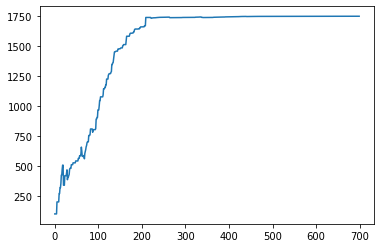

In [29]:
# Training
scores = []
for i in range(700): #repeat scenario for 700 times
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state) #which have non negative reward
    action = sample_next_action(available_act) #one of the sample is randomly chosen
    score = update(current_state,action,gamma) #caculate score
    scores.append(score) #Train 할수록 score 높아지는지 확인
    print ('Score:', str(score))
    
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

# Testing
current_state = 0
steps = [current_state]


while current_state != 9: #location 도착하면 멈춤

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1] #next action place which maximize Q function
    
    #max 여러개일 경우
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps) #most efficient path calculated from model

plt.plot(scores)
plt.show()

In [36]:
#(d)

#gamma=0.3
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

# learning parameter
gamma = 0.3

initial_state = 1

#for given current state, they are finding some state where reward is non negative
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state) 

#randomly sample one of availble action
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

action = sample_next_action(available_act)


#updating Q table by using iterative Bellman equation and return the score
def update(current_state, action, gamma):
    
  max_index = np.where(Q[action,] == np.max(Q[action,]))[1] 
  
  #max가 여러 개일 수 있음
  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = Q[action, max_index]
  
  Q[current_state, action] = R[current_state, action] + gamma * max_value
  print('max_value', R[current_state, action] + gamma * max_value)
  
  if (np.max(Q) > 0):
    return(np.sum(Q/np.max(Q)*100)) #score to measure whether our reinforcement learning update well
  else:
    return (0)
    
update(initial_state, action, gamma)

max_value 0.0


0

max_value 100.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 130.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 139.0
Score: 193.5251798561151
max_value 0.0
Score: 193.5251798561151
max_value 0.0
Score: 193.5251798561151
max_value 0.0
Score: 193.5251798561151
max_value 0.0
Score: 193.5251798561151
max_value 0.0
Score: 193.5251798561151
max_value 41.699999999999996
Score: 223.5251798561151
max_value 100.0
Score: 295.46762589928056
max_value 30.0
Score: 317.0503597122302
max_value 0.0
Score: 317.0503597122302
max_value 0.0
Score: 317.0503597122302
max_value 0.0
Score: 317.0503597122302
max_value 109.0
Score: 323.5251798561151
max_value 41.699999999999996
Score: 353.5251798561151
max_value 0.0
Score: 353.525179856

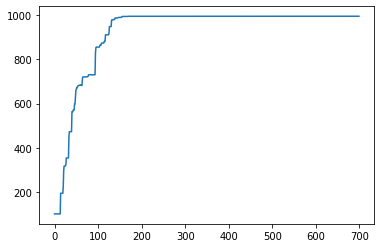

In [37]:
# Training
scores = []
for i in range(700): #repeat scenario for 700 times
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state) #which have non negative reward
    action = sample_next_action(available_act) #one of the sample is randomly chosen
    score = update(current_state,action,gamma) #caculate score
    scores.append(score) #Train 할수록 score 높아지는지 확인
    print ('Score:', str(score))
    
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

# Testing
current_state = 0
steps = [current_state]


while current_state != 9: #location 도착하면 멈춤

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1] #next action place which maximize Q function
    
    #max 여러개일 경우
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps) #most efficient path calculated from model

plt.plot(scores)
plt.show()

In [32]:
#gamma=0.5
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

# learning parameter
gamma = 0.5

initial_state = 1

#for given current state, they are finding some state where reward is non negative
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state) 

#randomly sample one of availble action
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

action = sample_next_action(available_act)


#updating Q table by using iterative Bellman equation and return the score
def update(current_state, action, gamma):
    
  max_index = np.where(Q[action,] == np.max(Q[action,]))[1] 
  
  #max가 여러 개일 수 있음
  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = Q[action, max_index]
  
  Q[current_state, action] = R[current_state, action] + gamma * max_value
  print('max_value', R[current_state, action] + gamma * max_value)
  
  if (np.max(Q) > 0):
    return(np.sum(Q/np.max(Q)*100)) #score to measure whether our reinforcement learning update well
  else:
    return (0)
    
update(initial_state, action, gamma)

max_value 100.0


100.0

max_value 100.0
Score: 200.0
max_value 50.0
Score: 250.0
max_value 0.0
Score: 250.0
max_value 0.0
Score: 250.0
max_value 0.0
Score: 250.0
max_value 50.0
Score: 250.0
max_value 100.0
Score: 350.0
max_value 50.0
Score: 400.0
max_value 50.0
Score: 450.0
max_value 150.0
Score: 333.33333333333326
max_value 25.0
Score: 349.99999999999994
max_value 50.0
Score: 349.99999999999994
max_value 50.0
Score: 349.99999999999994
max_value 25.0
Score: 366.66666666666663
max_value 100.0
Score: 433.33333333333326
max_value 175.0
Score: 385.71428571428567
max_value 50.0
Score: 414.2857142857142
max_value 0.0
Score: 414.2857142857142
max_value 100.0
Score: 414.2857142857142
max_value 0.0
Score: 414.2857142857142
max_value 0.0
Score: 414.2857142857142
max_value 187.5
Score: 433.33333333333337
max_value 0.0
Score: 433.33333333333337
max_value 25.0
Score: 433.33333333333337
max_value 25.0
Score: 446.6666666666667
max_value 0.0
Score: 446.6666666666667
max_value 25.0
Score: 446.6666666666667
max_value 93.75
Sco

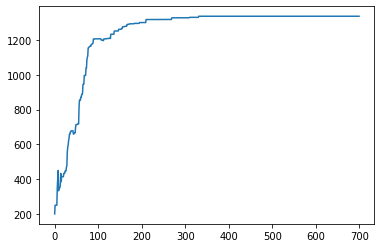

In [33]:
# Training
scores = []
for i in range(700): #repeat scenario for 700 times
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state) #which have non negative reward
    action = sample_next_action(available_act) #one of the sample is randomly chosen
    score = update(current_state,action,gamma) #caculate score
    scores.append(score) #Train 할수록 score 높아지는지 확인
    print ('Score:', str(score))
    
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

# Testing
current_state = 0
steps = [current_state]


while current_state != 9: #location 도착하면 멈춤

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1] #next action place which maximize Q function
    
    #max 여러개일 경우
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps) #most efficient path calculated from model

plt.plot(scores)
plt.show()

In [34]:
#gamma=0.9
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

# learning parameter
gamma = 0.9

initial_state = 1

#for given current state, they are finding some state where reward is non negative
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state) 

#randomly sample one of availble action
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

action = sample_next_action(available_act)


#updating Q table by using iterative Bellman equation and return the score
def update(current_state, action, gamma):
    
  max_index = np.where(Q[action,] == np.max(Q[action,]))[1] 
  
  #max가 여러 개일 수 있음
  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = Q[action, max_index]
  
  Q[current_state, action] = R[current_state, action] + gamma * max_value
  print('max_value', R[current_state, action] + gamma * max_value)
  
  if (np.max(Q) > 0):
    return(np.sum(Q/np.max(Q)*100)) #score to measure whether our reinforcement learning update well
  else:
    return (0)
    
update(initial_state, action, gamma)

max_value 100.0


100.0

max_value 0.0
Score: 100.0
max_value 100.0
Score: 200.0
max_value 0.0
Score: 200.0
max_value 100.0
Score: 200.0
max_value 0.0
Score: 200.0
max_value 0.0
Score: 200.0
max_value 190.0
Score: 152.6315789473684
max_value 100.0
Score: 205.26315789473682
max_value 0.0
Score: 205.26315789473682
max_value 90.0
Score: 252.6315789473684
max_value 0.0
Score: 252.6315789473684
max_value 100.0
Score: 305.2631578947368
max_value 0.0
Score: 305.2631578947368
max_value 90.0
Score: 352.63157894736844
max_value 0.0
Score: 352.63157894736844
max_value 0.0
Score: 352.63157894736844
max_value 90.0
Score: 400.0
max_value 81.0
Score: 442.63157894736844
max_value 100.0
Score: 495.2631578947369
max_value 190.0
Score: 542.6315789473684
max_value 190.0
Score: 590.0
max_value 0.0
Score: 590.0
max_value 0.0
Score: 590.0
max_value 171.0
Score: 680.0
max_value 271.0
Score: 506.6420664206642
max_value 0.0
Score: 506.6420664206642
max_value 190.0
Score: 539.8523985239852
max_value 243.9
Score: 566.7527675276754
max_va

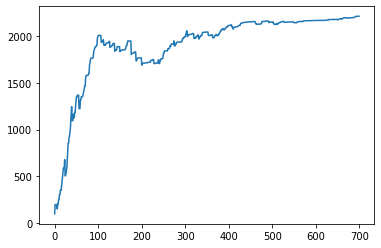

In [35]:
# Training
scores = []
for i in range(700): #repeat scenario for 700 times
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state) #which have non negative reward
    action = sample_next_action(available_act) #one of the sample is randomly chosen
    score = update(current_state,action,gamma) #caculate score
    scores.append(score) #Train 할수록 score 높아지는지 확인
    print ('Score:', str(score))
    
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

# Testing
current_state = 0
steps = [current_state]


while current_state != 9: #location 도착하면 멈춤

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1] #next action place which maximize Q function
    
    #max 여러개일 경우
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps) #most efficient path calculated from model

plt.plot(scores)
plt.show()

In [5]:
#gamma=0.98
Q = np.matrix(np.zeros([MATRIX_SIZE,MATRIX_SIZE]))

# learning parameter
gamma = 0.98

initial_state = 1

#for given current state, they are finding some state where reward is non negative
def available_actions(state):
    current_state_row = R[state,]
    av_act = np.where(current_state_row >= 0)[1]
    return av_act

available_act = available_actions(initial_state) 

#randomly sample one of availble action
def sample_next_action(available_actions_range):
    next_action = int(np.random.choice(available_act,1))
    return next_action

action = sample_next_action(available_act)


#updating Q table by using iterative Bellman equation and return the score
def update(current_state, action, gamma):
    
  max_index = np.where(Q[action,] == np.max(Q[action,]))[1] 
  
  #max가 여러 개일 수 있음
  if max_index.shape[0] > 1:
      max_index = int(np.random.choice(max_index, size = 1))
  else:
      max_index = int(max_index)
  max_value = Q[action, max_index]
  
  Q[current_state, action] = R[current_state, action] + gamma * max_value
  print('max_value', R[current_state, action] + gamma * max_value)
  
  if (np.max(Q) > 0):
    return(np.sum(Q/np.max(Q)*100)) #score to measure whether our reinforcement learning update well
  else:
    return (0)
    
update(initial_state, action, gamma)

max_value 0.0


0

max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 0.0
Score: 0
max_value 100.0
Score: 100.0
max_value 100.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 0.0
Score: 100.0
max_value 100.0
Score: 100.0
max_value 100.0
Score: 200.0
max_value 100.0
Score: 300.0
max_value 0.0
Score: 300.0
max_value 0.0
Score: 300.0
max_value 0.0
Score: 300.0
max_value 100.0
Score: 300.0
max_value 198.0
Score: 201.010101010101
max_value 0.0
Score: 201.010101010101
max_value 100.0
Score: 201.010101010101
max_value 0.0
Score: 201.010101010101
max_value 100.0
Score: 251.5151515151515
max_value 0.0
Score: 251.5151515151515
max_value 98.0
Score: 301.01010101010104
max_value 0.0
Score: 301.01010101010104
max_value 0.0
Score: 301.01010101010104
max_value 0.0
Score: 301.01010101010104
max_value 0.0
Score: 301.01010101010104
max_value 198.0
Score: 401.01010101010104
max_value 98.0
Score: 401.01010101010104
max_value 98.0
Score: 450

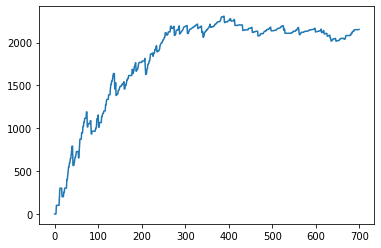

In [6]:
# Training
scores = []
for i in range(700): #repeat scenario for 700 times
    current_state = np.random.randint(0, int(Q.shape[0]))
    available_act = available_actions(current_state) #which have non negative reward
    action = sample_next_action(available_act) #one of the sample is randomly chosen
    score = update(current_state,action,gamma) #caculate score
    scores.append(score) #Train 할수록 score 높아지는지 확인
    print ('Score:', str(score))
    
print("Trained Q matrix:")
print(Q/np.max(Q)*100)

# Testing
current_state = 0
steps = [current_state]


while current_state != 9: #location 도착하면 멈춤

    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1] #next action place which maximize Q function
    
    #max 여러개일 경우
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size = 1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

print("Most efficient path:")
print(steps) #most efficient path calculated from model

plt.plot(scores)
plt.show()